<a href="https://colab.research.google.com/github/teixeiragthiago/portfolio/blob/main/Analisando_os_Dados_do_Airbnb_(Los_Angeles).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Los Angeles*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2021-01-02/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,2016-05-15,0.02,1,279
1,2708,Runyon Canyon | Beau Furn Mir Mini-Suite Fire...,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,68,30,28,2020-11-08,0.35,2,316
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,155,1,21,2019-12-27,0.18,2,365
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,50,30,0,NaN,NaN,1,0
4,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98750,-118.43200,Private room,42,30,310,2020-04-29,2.22,5,273


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. A mesma possui 32175 entradas e 15 variáveis. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 32175 entradas e 106 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 32175
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**


A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.



*   É possível ver que a coluna `reviews_per_month` e `last_review` possuem 23% de seus valores faltantes






In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.234965
last_review                       0.234965
host_name                         0.000280
name                              0.000062
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

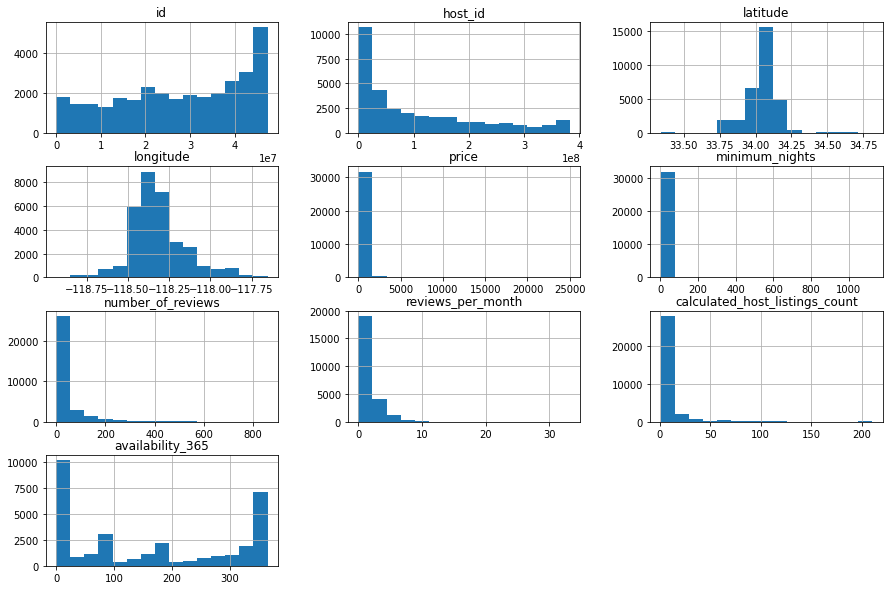

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));


## Verificação e remoção de possíveis Outliers

Aqui iremos realizar um resumo estatístico por meio do método `describe()`


In [ ]:
#Resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
    'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,32175.000000,32175.000000,32175.000000,24615.000000,32175.000000,32175.000000
mean,220.870427,18.747568,34.376752,1.404572,9.266107,162.678757
std,596.925791,32.948624,66.202817,1.650527,24.144674,146.444838
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,2.000000,1.000000,0.240000,1.000000,0.000000
50%,110.000000,25.000000,6.000000,0.790000,2.000000,139.000000
75%,187.500000,30.000000,36.000000,2.020000,5.000000,335.000000
max,24999.000000,1125.000000,858.000000,33.240000,210.000000,365.000000


Analisando o resumo estatístico acima, podemos confirmar algumas hipóteses como:



*   A variavel price possui 75% de seus valores abaixo de 187.5, porém, seu valor máximo é de 24999

* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


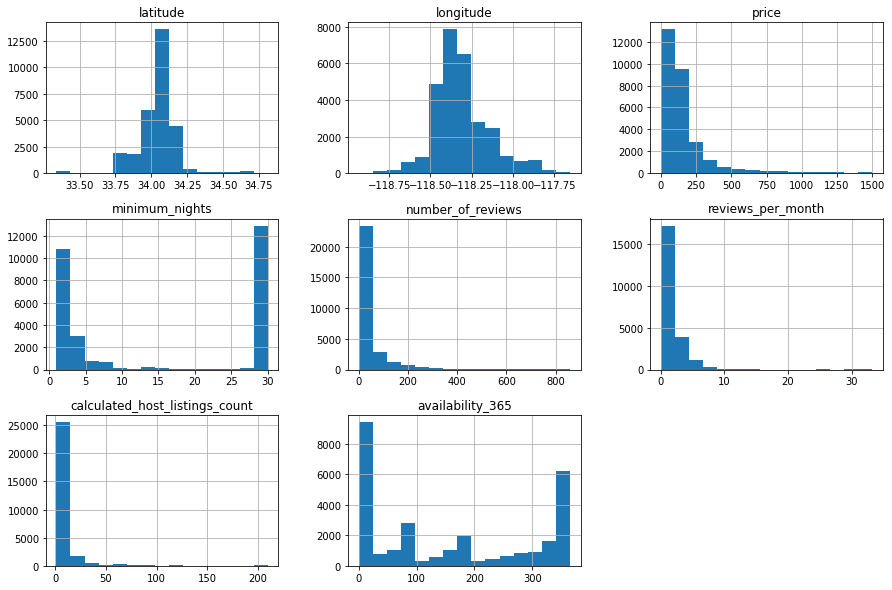

In [ ]:
#Criar e plotar um DataFrame limpo e sem Outliers

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#Remover id e id_host pq nao faz sentido ter isso aqui

df_clean.drop("id", axis=1, inplace=True)
df_clean.drop("host_id", axis=1, inplace=True)

df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

A média dos preços dos aluguéis é de 165.91

In [ ]:
# ver a média da coluna `price``

avg_rentprice = df_clean.price.sum() / df_clean.shape[0]

print("A média dos preços dos aluguéis é de:", avg_rentprice)


A média dos preços dos aluguéis é de: 165.91171377112772


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação

corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()


# mostrar a matriz de correlação

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.027942,-0.067342,-0.053077,0.012196,0.092654
minimum_nights,-0.027942,1.000000,-0.155223,-0.303060,0.112254,-0.000244
number_of_reviews,-0.067342,-0.155223,1.000000,0.702671,-0.106051,0.059382
reviews_per_month,-0.053077,-0.303060,0.702671,1.000000,-0.074958,0.068051
calculated_host_listings_count,0.012196,0.112254,-0.106051,-0.074958,1.000000,0.144523
availability_365,0.092654,-0.000244,0.059382,0.068051,0.144523,1.000000


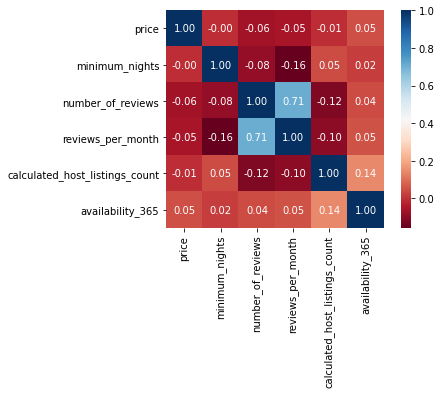

In [ ]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap="RdBu", fmt=".2f", square=True, linecolor="white", annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()


Entire home/apt    18208
Private room        9498
Shared room         1024
Hotel room           142
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.565905
Private room       0.295198
Shared room        0.031826
Hotel room         0.004413
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Los Angeles?**

---



In [ ]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Westlake Village                         670.416667
Leona Valley                             582.000000
Malibu                                   570.254980
Beverly Crest                            568.071429
Bel-Air                                  465.500000
Hollywood Hills West                     425.167630
Avalon                                   399.032787
Unincorporated Santa Monica Mountains    397.382609
Palos Verdes Estates                     390.166667
Pacific Palisades                        352.068182
Name: price, dtype: float64

In [ ]:
# Ver a quantidade de imóveis em Westlake Village

print(df_clean[df_clean.neighbourhood == "Westlake Village"].shape)


(12, 14)


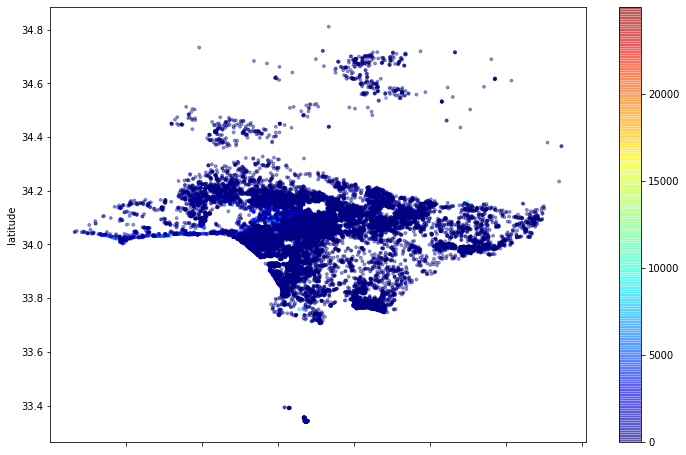

In [ ]:
# plotar os imóveis pela latitude-longitude

df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

avg_minimumnights = df.minimum_nights.sum() / df.shape[0]

print("A média do mínimo de noite dos aluguéis é de:", avg_minimumnights)


A média do mínimo de noite dos aluguéis é de: 18.747567987567987


## Conclusões
